In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

=================================================================================================================
# Lecture Notes: Model Performance


##### D.Vidotto, Data Mining: JBI030 2019/2020


=================================================================================================================

In this lecture, we will explore several metrics for the evaluation of Machine Learning/Data Mining algorithms, which are tailored specifically for *Regression* and *Classification* tasks. It is important to be aware that evaluation metrics can be (and in general are) different from the *cost* (or *loss*) functions used when estimating the model (by means of optimization techniques). In this notebooks, we will deal with evaluation of model perfomance; in future lectures, we will see the algorithm-specific cost functions (which is assessed *after* the model is trained).    

The topics covered in this lecture are the following ones: 
 1. performance measures in regression 
   * (mean) squared error
   * (mean) absolute error
 1. performance measures in classification
   * accuracy
   * confusion matrix 
   * Sensitivity, Specificity, Precision, Recall
   * ROC and AUC
   * Precision/Recall Curve
   * $F_1$ score
   * multiclass classification
 
 
In this lecture (and the next ones), we are going to use the following notation. A rectangular data frame and its variables/observations will be denoted as follows: 



|Instance| $X_1$ | $X_2$ | ... |$X_j$ | $\cdots$  | $X_p$ |  $Y$ | 
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|1| $x_{11}$ | $x_{12}$ | $\cdots$  |$x_{1j}$ | $\cdots$  | $x_{1p}$ | $y_{1}$ |
|2| $x_{21}$ | $x_{22}$ | $\cdots$  |$x_{2j}$ | $\cdots$  | $x_{2p}$ | $y_{2}$ |
|$\vdots$ |  $\vdots$    |  $\vdots$ |$\vdots$ | $\vdots$ |  $\vdots$ |  $\vdots$ |  $\vdots$  |
|i| $x_{i1}$ | $x_{i2}$ | $\cdots$  |$x_{ij}$ | $\cdots$  | $x_{ip}$ | $y_{i}$ |
|$\vdots$ |  $\vdots$    |  $\vdots$ |$\vdots$ | $\vdots$ |  $\vdots$ |  $\vdots$ |  $\vdots$  |
|n| $x_{n1}$ | $x_{n2}$ | $\cdots$  |$x_{nj}$ | $\cdots$  | $x_{np}$ | $y_{n}$ |

where $n$ is the number of observations, $p$ is the number of features, $i$ indexes the instances (the examples), $j$ indexes the features, and $Y$ is the output variable (we are in a *supervised learning* settings). Remember: in regression, the label $y_i \in \mathbb{R}$, while in classification, each label $y_i \in \{1,\cdots,C\}$ with $C \in \mathbb{N}$. The $p$-dimensional vector of observations for the $i$-th unit will be denoted by $\mathbf{x}_i$. 

**Note**: features can also be referred to as predictors, input variables, attributes. Observations are also called units, data points, examples, or instances. 

### 1. Performance Measures in Regression

As observed during the introductory class, when we feed data into a Machine Learning model, the algorithm is trying to learn a function $f$; for example, in regression, we try to model the output $y$ with  

$$ y_i = f(\mathbf{x}_i) + e_i, $$

that is, a map from the input space $X$ to the output space $Y$. Because it is in general impossible to learn the $y_i$'s exactly (as all ML algorithms make assumptions on the data), we allow for the presence of an error term $e_i$. Such term is define as the *discrepancy* between the observed output and the model prediction, i.e.   

$$ e_i = y_i-\hat{y}_i $$

where $\hat{y}_i = \hat{f}(\mathbf{x}_i)$. Error terms tell us how much the model is "off" the truth for each example: the smaller (i.e., close to 0) the errors, the better the model can predict it. 
<br> 

<img src="./img/model_performance/regression_residuals.png" width="350" height="50"/>

When we are considering the full dataset (all observations from 1 to $n$) we use the sum of the errors for the global evaluation of the model. However, because negative and positive errors will tend to balance each other, such sum will be generally equal to 0. To obviate this, we take the sum of the *squared* errors. The function that measures the sum of the squared differences between the true observations and model predictions are called *sum of squares* (or **squared error**); formally, this is: 

$$SS(\hat{y},y) = \sum_{i=1}^{n} (y_i-\hat{y}_i)^2$$

Because what we want to do is to obtain SS that is as low as possible, what is typically done in machine learning is to minimize this value, w.r.t. a specific shape of the function $f(X)$ (for example, a linear model). Furthermore, $SS$ can be used to evaluate the model once the estimation step has been performed. Since $SS$ depends on the sample size, it is common to take the mean, to obtain what is known as the *mean squared error* (**MSE**). If, as a further step, we square-root of the MSE, we obtain the *root mean squared error* (**RMSE**): 

$$RMSE(\hat{y},y) = \sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y}_i)^2}$$

The RMSE can be nicely interpreted as the "average error made by the model for each unit", as it is in the same scale of $y$. An advantage of RMSE is that it is twice differentiable everywhere, and for some models (such as linear models) we can find the solutions for $\hat{y}_i$ in close-form. 
<br> 
A disadvantage of RMSE is that it is very sensible to the presence of outliers, as the operation of squaring strongly inflates larger (positive and negative) values. An alternative to it is represented by the *mean absolute error* (**MAE**), which is an average of the *absolute values* of the error made by the model: 

$$ MAE(\hat{y},y) = \frac{1}{n}\sum_{i=1}^{n} |{y_i-\hat{y}_i}|  $$

The issue with MAE is that it is not differentiable at 0, and thus performing optimization with such loss function requires more involved techniques. Nevertheless, MAE can be used as a performance metrics under a regression setting.
<br>

In what follows, you can see why MSE and MAE lead to different error sizes.

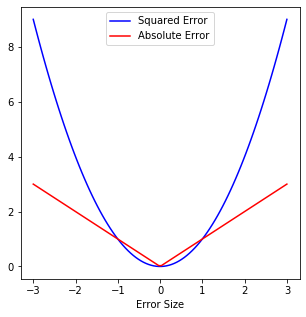

In [2]:
plt.figure(figsize=(5,5))
plt.plot(np.linspace(-3,3,100), np.square(np.linspace(-3,3,100)), "b-", label="Squared Error")
plt.plot(np.linspace(-3,3,100), np.absolute(np.linspace(-3,3,100)), "r-", label="Absolute Error")
plt.xlabel("Error Size")
plt.legend()
plt.show()

Another common measure of fit in regression is the $R^2$, a.k.a. Coefficient of determination. It can be described as the percentage of variance in the output variable that is explained by the model, or - equivalently - as the square of the Pearson correlation between the observed $y$ and the predicted $\hat{y}$:

$$R^2 = corr(y, \hat{y})^2$$

$R^2$ ranges between 0 and 1, where values close to 1 indicate a better fit. Thus, unlike MAE and RMSE, the goal is to *maximize*, rather than minimize, $R^2$.

We are now going to evaluate a multiple linear regression model on a real-data example. We *train* (which really means *fitting*) the model on the *Boston house-price* dataset, which is included in *scikit-learn*. For the training, we will use the *training set* created with `train_test_split` (already encountered during the Data Preprocessing lecture); the models will then be evaluated on the *test set*. The goal is to predict new house prices given the input features:

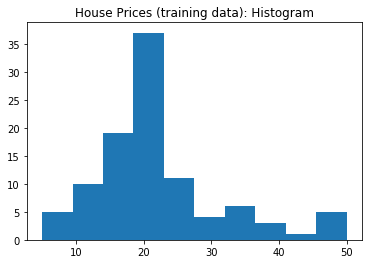

In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = load_boston(return_X_y=True)
# Split the dataset retaining 80% of the data for the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
# Show the histogram of house prices
pd.Series(y_train).hist(grid=False)
plt.title("House Prices (training data): Histogram")
plt.show()

Let us now fit the model (`scikit-learn` trains the linear regression model by minimizing the sum-of-squares):

In [4]:
# Note: here we are training a linear regression model without performing any data preprocessing 
# In real world applications, data should be preprocessed first!
# Remember the step of a sklearn model: 1.initialize; 2.train; 3.predict
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

We can now use the RMSE/MAE/$R^2$ metrics to evaluate the model:

In [5]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
{"RMSE":rmse, "MAE":mae, "R2:":r2}

{'RMSE': 4.814941555935472,
 'MAE': 3.4962308560549102,
 'R2:': 0.7219648298245811}

`scikit-learn` models also come automatically with a `score()` method, which usually returns the $R^2$ coefficient:  

In [6]:
lin_reg.score(X_test,y_test)

0.7219648298245811

**Note**: while we are using here RMSE, MAE and $R^2$ together for introducing the three metrics, in real world applications you should choose beforehand one metric and stick with it all along the analysis; that is, different models must be compared using always the same metric. You can learn about more regression metrics in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics). 

## 2. Performance Measures in Classification

Unlike regression, in classification we are interested in predicting *labels* rather than numbers. For example, we might interested in predicting wether a person is with/without heart disease, if an e-mail can be considered ham/spam, and so on. In this case, we can *map* each label to a number, but the value of the number in itself is meaningless: we could choose, for example, to set *presence of heart disease* to 0 and *absence of heart disease* to 1; equivalently, we could choose *presence of heart diseae* = 103, and *absence of hear disease* = -54. What matters are the meaning of the labels, rather than the numbers. For classification, we will use the convention that $y_i \in \{1,...,C\}$ with $C \in \mathbb{N}$ when we need to predict an output with $C$ possible labels. In the special case where $C=2$, we will refer (without loss of generality) to *positive class* and *negative class* for the two classes, where the positive one is considered the class of interest.  <br>
In classification, we are interested in detecting **decision regions** in the feature space. That is, given a point $\mathbf{x}$ in the feature space, we are interested in knowing to what label $\{1,...,C\}$ the classifier must assign the point. We will explore different classifiers during the course, and each classifier produces predictions in a different way; how labels are predicted is the subject of the coming lectures. The different regions are separated by the **decision boundary**. The decision boundary are all those points in the feature space that have the same probability to belong to two (or more) classes. In what follows, you will see a simulated example of *decision regions* and *decision boundary* for a binary (two-class) case, with two features, $x_1$ and $x_2$. The decision regions are highlighted by different colors in the background, and represent the model predictions. 

**Note**: in this example, classification is performed with a method called *k-nearest-neighbors* (knn). We will explore such model later on in the course. For the moment, you just need to know roughly how this algorithm works: given a point $\mathbf{x}$ in the feature space: knn (1) takes the $k$ closest data points ("neighbors") to $\mathbf{x}$, (2) evaluates their labels, and (3) assigns to $\mathbf{x}$ the most frequent label across such points. In knn, $k$ is a *hyperparameter* that can vary and, in general, must be tuned. In this example, we will use $k=5$ (the default in `scikit-learn`). You can read more about the implementation of knn in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

In [7]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# We randomly generate a two-class, two-features dataset with 500 instances 
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=1)
# Retain 80% of the samples in the training dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Fit knn (default: k=5)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

This algorithm produces the following decision boundary and regions: 

<img src="./img/model_performance/knn_binary.png" width="2000"/>

**Note**: in what follows, and until section 2.7 (`Multiclass classification`), we will assume we are in the two-class case.

## 2.1 Accuracy

It is reasonable, in classification, to consider "errors" all those units which are miss-classified by the model. That is, those units which are in the 'wrong side' of the decision boundary; in the example above, we can detect the miss-classified instances by observing which data points have one color, but are located in a region of opposite color. These units are the 'incorrectly classified instances' by the model (knn in this case); they can be mathematically denoted as all those $i$ for which $y_i \neq \hat{y}_i$. Conversely, correctly classified instances can be indicated as all those units $i$ for which $y_i = \hat{y}_i$. 
<br> 
When evaluating a classifier, a typical performance measure is given by the **miss-classification rate**:  

$$ \frac{1}{n}\sum_{i=1}^{n} \mathcal{I}(y_i \neq \hat{y}_i) $$

which ranges between 0 (no misclassifications at all, or perfect classifications), and 1 (all units are miss-classified). Here, $\mathcal{I}(condition)$ is the indicator function:

$$\mathcal{I}(condition) = 
\left\{
\begin{array}{rl}
1 & if\ condition\ is\ True \\
0 & otherwise
\end{array}
\right.
$$


Equivalently, a classifier can be evaluated with the **accuracy** measure, which is symmetric to the miss-classification rate: 

$$Accuracy = \frac{1}{n}\sum_{i=1}^{n} \mathcal{I}(y_i = \hat{y}_i).  $$

Accuracy also varies between $0$ and $1$, but of course the interpretation of its values must be flipped w.r.t. the miss-classification rate. Clearly, the goal is to maximize accuracy (that is, achieving as many accurate predictions as possible), or equivalently to minimize the miss-classification rate (that is, achieving as few errors as possible).  

`scikit-learn` allows evaluting the accuracy of a classifier:

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.89

This means that 89% of the (test) data points were correctly classified by knn. Classifiers in scikit-learn also have a built-in `score()` method (see the scikit-learn documentation for knn linked above), which reports the accuracy: 

In [9]:
knn.score(X_test,y_test)

0.89

`scikit-learn` also allows picking different evaluation functions for classification. You can find more about it in the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics). In what follows, we are going to explore some of them. 

## 2.2 Confusion matrix 

While accuracy is a good way to obtain a single measure of model performance, it is also not very informative. In cases of imbalanced datasets (as we have seen during the Data Pre-Processing lecures), resorting to accuracy can be misleading: if there was a class observed 99% of the time, a classifier that always predicts that class (without using any information from the predictors) would always get 99% accuracy. Furthermore, accuracy doesn't tell us in *what class* the miss-classifications occur more frequently. Is it the positive labels that are mostly classified as negative, or the other way around?  For instance, we had 11% miss-classified instances by knn in the example above: which one is the most mis-classified class?

Knowing this information can help us to better tailor our classifiers, and correct them towards one or the other direction. Possibly, such information can also help us to revise our data preprocessing strategy in a new stage of analysis refining. 

Fortunately, there is a simple tool that allows us retrieving such information: the confusion matrix! It is a $C \times C$  (in our example: 2 $\times$ 2) matrix which displays the true class in the rows, and the predicted class in the columns. In the cells of the matrix we find a count of how many units observed within each class (rows) are predicted to be in a specific class by the model (columns). Therefore, the diagonal elements of the matrix display the number of points correctly classified by the model, and the off-diagonal tell us how many units observed in the class of row $i$ are classified in the column of the row $j$. For a two-class case, the confusion matrix looks as follows: 

|            | Predicted Positive | Predicted Negative  |
|:---:|:---:|:---:|
|Observed Positive      | TP | FN |
|Observed Negative     | FP  | TN |

where: 
 * TP = number of *true positives* 
 * FN = number of *false negatives* 
 * FP = number of *false positives* 
 * TN = number of *true negatives*
 
For example, the false negatives are the points that are classified in the negative class, but actually belong to the positive one. The sum of the rows gives information about how many instances belong to each class; the sum of the columns gives information about how many instances have been classified to each class. 

Clearly, a classifier with 100% accuracy has the off-diagonal elements of the confusion matrix all equals to 0; maximizing the accuracy then corresponds to maximizing the elements in the diagonal of the confusion matrix. In scikit-learn we can visualize the confusion matrix for our example in this way: 

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[42,  5],
       [ 6, 47]])

You should be aware of the fact that `scikit-learn` order the rows and columns numerically; therefore, the first row of the matrix correspond to the units having label '0', and the second row to units having label '1', and similarly for the columns. Therefore, if we take class '1' as being the positive class, we must swap the order of rows and columns of the confusion matrix seen above; for example, in this case knn classifies 42 true negatives, and 6 false negatives. 

We can also obtain a 'normalized' version of the confusion matrix:

In [11]:
confusion_matrix(y_test, y_pred, normalize='all')

array([[0.42, 0.05],
       [0.06, 0.47]])

which tells us that 5% of the test units are false positives (once again, considering class 1 as the 'positive' class). We can also visualize the confusion matrix graphically:  

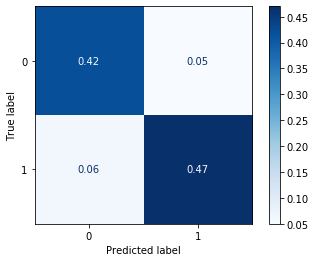

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_cm = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues,
                                 normalize='all')

And, finally, we can extract the number of true positives, true negative, false positives and false negatives:

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Show the true positives: 
tp

47

## 2.3 Sensitivity, Specificity, Precision, Recall
**Precision and Recall**. From the confusion matrix there are other quantities of interest that we can calculate. The **precision** of a (binary) classifier measures how many units, among the ones classified as positives, really belong to the positive class: 

$$Precision = \frac{TP}{TP + FP}.$$

If the classifier classifies only one single positive unit as positive, we would have 100% precision, but the classifier wouldn't be a very useful classifier, as we would not consider all other positive instances. Thus, Precision is usually evaluated along with the **recall**, which measures how many units, among the ones that are truly positive, have been classified correctly: 

$$Recall = \frac{TP}{TP + FN}$$

While it is desirable to have both high precision and recall (close to 1, the maximum), this can be difficult to achieve: increasing the recall usually corresponds to decreasing precision, and vice versa. This is the *precision/recall tradeoff*. 

The following image [taken from Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) can help to get a clearer picture:

<img src="./img/model_performance/precision_recall_wikipedia.png" width="300"/>

We can calculate the precision and recall of our knn classifier in scikit-learn as follows (once again, pay attention to what class is considered positive by `scikit-learn`!): 

In [14]:
from sklearn.metrics import precision_score, recall_score
precision, recall = (precision_score(y_test, y_pred), recall_score(y_test, y_pred))   
precision, recall

(0.9038461538461539, 0.8867924528301887)

**Sensitivity and Specificiy**. Other two quantities that are usually considered together are the **sensitivity** of a classifier, and its **specificity**. The sensitivity is equivalent to the Recall, i.e., proportion of positives units among the ones classified as positives. Sensitivity and Recall are also known as True Positive Rate (TPR). The specificity, instead, is also known as True Negative Rate, and is calculated as the proportion of instances correctly classified as negatives among all the truly negative instances: 

$$Specificity = TNR = \frac{TN}{TN+FP}$$

This can be viewed as the ability of the classifier to correctly identify negative instances. As for precision and recall, there exists a tradeoff between sensitivity and specificity. As before, [Wikipedia](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) can help to obtain a better graphical overview of TPR and TNR:

<img src="./img/model_performance/sensitivity_specificity_wikipedia.png" width="300"/>

Classifiers can be evaluated and compared by plotting two curves that are widely used: the *Precision/Recall curve*, and the *ROC curve*.

============================================================================================
####  Digression: how classifiers classify
Before understanding Precision/Recall and ROC curves, it is important to understand how a classifier performs predictions. In fact, most (but not all!) classifiers do not predict a class directly; instead, for each instance $i$ they first produce (directly or indirectly) a real number by means of a *decision function* $f(\mathbf{x}_i)$, which is in turn transfomed into a probability (included between $0$ and $1$). The latter tells us how much we are confident about the probability for each unit to belong to the positive class, and can be interpreted as the probability for a unit to be predicted in the positive class by the model. For instance, a probability close to $0$ indicates that the classifier is very confident that the unit belongs to the negative class; and a probability close to $1$ that it belongs to the positive class. We will see how these numbers are yielded by each method in the coming lectures. Keep in mind that some classifiers only calculate the decision function in order to make a prediction, while others calculate the class probability directly (without decision function). (In `scikit-learn`, the decision function values can be retrieved with the `decision_function` method of a classifier; the transformed probabilities can be retrieved with `predict_proba`. Not all classifiers support the `decision_function` method (for example, `KNearestNeighbors` doesn't); and not all classifiers have a `predict_proba` method (for instance, `SVC` doesn't). Some classifiers, like logisic regression, have both methods).

To perform predictions, classifiers assigns the unit to a class based on a certain *threshold*; in general, it is sensible to use a threshold of 0.5 (when working with probabilities), which means that units are assigned to the positive class only when we are more than 50% certain of such decision. Although reasonable, this choice is purely arbitrary: in reality, we can potentially modify such threshold as we prefer; this, of course, depends on the application, data, and context with which we are performing the analysis. 

Let's take an example; suppose we have 10 test units (4 from the P class and 6 from the N class), and an already trained classifier has estimated the following probabilities (units are sorted from the least to the most likely): 

|**Observed Class**|N|N|N|N|P|N|P|P|N|P|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**Predicted Probability**|0.1|0.2|0.25|0.27|0.4|0.6|0.8|0.9|0.95|0.99|
 
With a threshold at 0.5, we would obtain the following predictions (highlighted are the miss-classifications):

|**Observed Class**|N|N|N|N|P|N|P|P|N|P|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**Predicted Probability**|0.1|0.2|0.25|0.27|0.4|0.6|0.8|0.9|0.95|0.99|
|**Predicted Class (thr. 0.5)**|N|N|N|N|**N**|**P**|P|P|**P**|P|
 
 Which yields an accuracy of 70%, recall (sensitivity) of 3/4 = 0.75, precision of 3/5 = 0.6, and specificity of 4/6 = 0.66. 
 
 
 Now, it appears clear that moving the threshold will modify such values; let's see how they change when the threshold to classify an instance to the positive class is increased to 0.85: 
 
|**Observed Class**|N|N|N|N|P|N|P|P|N|P|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**Predicted Probability**|0.1|0.2|0.25|0.27|0.4|0.6|0.8|0.9|0.95|0.99|
|**Predicted Class (thr. 0.85)**|N|N|N|N|**N**|N|**N**|P|**P**|P| 
 
 The accuracy is (by coincidence) still the same, 70%. The recall is now 2/4=0.5, the precision is 2/3=0.66, and the specificity is 5/6=0.83. 
 
Lastly, let's see what happens when we decrease the threshold to 0.15: 
 
|**Observed Class**|N|N|N|N|P|N|P|P|N|P|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|**Predicted Probability**|0.1|0.2|0.25|0.27|0.4|0.6|0.8|0.9|0.95|0.99|
|**Predicted Class (thr. 0.15)**|N|**P**|**P**|**P**|P|**P**|P|P|**P**|P|  

The accuracy has dropped to 50%; the recall now is at its maximum value, 4/4=1 (as all the positive instances are correctly classified), but the precision has dropped to 4/9=0.44, and the specificity is even lower, to 1/6=0.16. 


With this example, we have seen the Precision/Recall tradeoff in action: by modifying the decision threshold, we can increase the recall while decreasing the precision, and vice versa: it is not possible to increase both simultaneously. The same effect is observed for sensitivity (=recall) vs. specificity.
<br>

============================================================================================

## 2.4 ROC and AUC

Because the threshold used to classify units is arbitrary and can vary from setting to setting, the *receiver operating characteristic* (ROC) curve allows visualizing how the performance of the classifier vary under  different thresholds. 

In particular, the ROC curve plots the TPR (Sensitivity) in the y-axis, and the *false positive rate* (FPR) in the x-axis. FPR is defined as 

$$FPR = 1-Specificity,$$ 

and denotes the ratio of negative examples that are incorrectly classified as positive. We are now going to plot the ROC curve for the `knn` classifier. 

**Note**: the `roc_curve` function below takes as second argument the `predict_proba()` method of `knn`, which gives the probabilities estimated by the model to perform the predictions (in particular, column 1 -the second column- selects the probabilities to belong to the positive class). Some other classifiers (but not `knn`) also have a a `decision_function()` method that can be equally used for the input of `roc_curve`. We are going to explore how such functions (and class probabilities) are calculated in future lectures.   

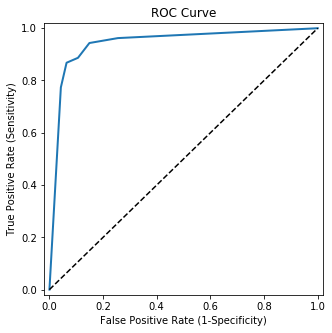

In [15]:
from sklearn.metrics import roc_curve
knn_probs = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
def plot_roc(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.xlim((-0.02,1.02))
    plt.ylim((-0.02,1.02))
    plt.title('ROC Curve')
plt.figure(figsize=(5,5))
plot_roc(fpr, tpr)

Also for FPR and TPR there is the tradeoff similar to the one observed previously: the higher the rate of true positives, the lower the rate of false positives, and vice versa. The diagonal line in the middle represents the ROC curve of a random classifier, i.e., of a classifier that performs classifications without using any information. The more a classifier is far from this line (towards the top-left corner), the better it performs.   

Let's now compare the ROC curves of the knn with the one of another classifier, in this case *knn* using $k=2$ neighbors (the plot, however, can be used also to classify different models, such as trees vs. logistic regression vs. NaiveBayes, not just knn models!):

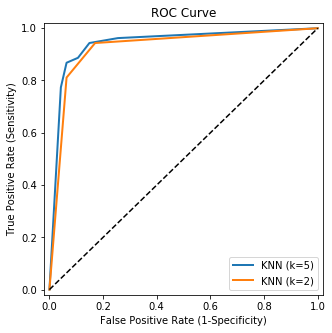

In [16]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
knn2_probs = knn2.predict_proba(X_test)[:,1]
knn2_fpr, knn2_tpr, knn2_thresholds = roc_curve(y_test, knn2_probs)
# Plot knn ROC curves
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, linewidth=2, label="KNN (k=5)")
plot_roc(knn2_fpr, knn2_tpr, label="KNN (k=2)")
plt.legend()
plt.show()

From the plot, knn with $k=5$ clearly performs better than knn with $k=2$. A measure that can summarize the information contained in the ROC curve is the *Area under ROC* (AUC). A perfect classifier would have an AUC equal to 1, while a completely random classifier has AUC=0.5.  

In [17]:
from sklearn.metrics import roc_auc_score
knn_auc = roc_auc_score(y_test, knn_probs)
knn_auc

0.9421918908069049

In [18]:
knn2_auc = roc_auc_score(y_test, knn2_probs)
knn2_auc

0.925531914893617

Thus, as the graph suggested, knn with k=5 (default option in scikit-learn) has a better AUC than knn with k=2 for this dataset. 

Now, let's suppose that we are interested, in our application, to maximize the TPR while keeping the FPR as low as possible. This can happen, for instance, when we want to have as little false positives as possible, while having a good level of true positives (e.g., when recognizing ham/spam e-mail, we want to mark as little ham e-mail as possible as spam, but at the same time try to detect as much spam as we can). After some search in the ROC curve of our original knn classifier (with $k$=5), we observe that the value we are searching for leads to a tpr of about 0.88. As a consequence, we can detect the thresholds needed to classify our examples as follows:

In [19]:
new_threshold = thresholds[np.max(np.where(tpr <= 0.88))]
new_threshold

0.8

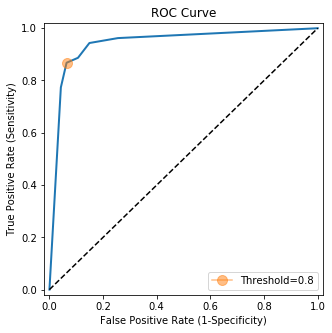

In [20]:
plt.figure(figsize=(5,5))
plot_roc(fpr, tpr)
plt.plot(fpr[np.max(np.where(tpr <= 0.88))], tpr[np.max(np.where(tpr <= 0.88))], marker="o", markersize=10, 
         alpha=0.5, label="Threshold=0.8")
plt.legend()
plt.show()

In [21]:
# Predictions and confusion matrix with the new threshold
y_pred_new_threshold = knn_probs >= new_threshold
y_pred_new_threshold
confusion_matrix(y_test, y_pred_new_threshold)

array([[44,  3],
       [ 7, 46]])

In [22]:
new_tpr, new_fpr = 46/(46+7), 3/(3+44)
new_tpr, new_fpr

(0.8679245283018868, 0.06382978723404255)

## 2.5 Precision/Recall Curve

Similarly to the ROC curve, the P/R (Precision/Recall) curve is plotted with the goal of evaluating classifiers when different thresholds are used to label the instances. In the P/R curve, Precision is plotted in the y-axis, and Recall is in the x-axis. Let's now visualize the P/R curve of the two classifiers we have used so far, `knn` with $k=5$ and `knn` with $k=2$. (Similar to the `roc_curve` function, also `precision_recall_curve` needs either class probabilities or decision function values as second argument). 

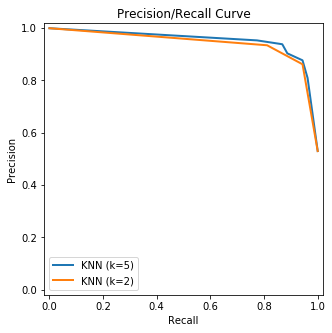

In [23]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, knn_probs)
knn2_precisions, knn2_recalls, knn2_thresholds = precision_recall_curve(y_test, 
                                                                        knn2_probs)

def plot_pr(recall, precision, label=None):
    plt.plot(recall, precision, linewidth=2, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.xlim((-0.02,1.02))
    plt.ylim((-0.02,1.02))
    plt.title('Precision/Recall Curve')
    
plt.figure(figsize=(5,5))
plt.plot(recalls, precisions, linewidth=2, label="KNN (k=5)")
plot_pr(knn2_recalls, knn2_precisions, label="KNN (k=2)")
plt.legend()
plt.show()

In contrast to the ROC curve, models that stay as close as possible to the top-right corner of the P/R curve perform better (=high precision, high recall). A measure for the area under the P/R curve is given by [the average precision score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html#sklearn.metrics.average_precision_score):

In [24]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, knn_probs)

0.928148107878731

In [25]:
average_precision_score(y_test, knn2_probs)

0.9022666968402592

The P/R curve considers, for this data, `knn` with $k=5$ a better classifier. Similar to what we have seen for the ROC curve, we can select an optimal threshold (based on our application, of course) also with the P/R curve. Let's say we decide to have no less than 90% precision: 

In [26]:
new_threshold = thresholds[np.min(np.where(precisions >= 0.9))]
new_threshold

0.6

In [27]:
precisions[np.min(np.where(precisions >= 0.9))]

0.9038461538461539

This corresponds to a recall of about 0.89 which, depending on the application, can be considered a reasonable level (otherwise the level of precision must be adjusted accordingly):

In [28]:
recalls[np.min(np.where(precisions >= 0.9))]

0.8867924528301887

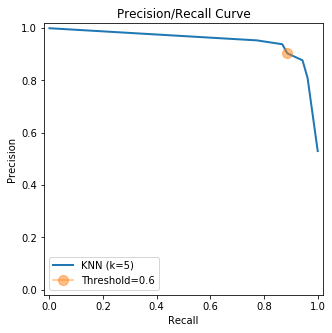

In [29]:
plt.figure(figsize=(5,5))
plot_pr(recalls, precisions, label="KNN (k=5)")
plt.plot(recalls[np.min(np.where(precisions >= 0.9))], precisions[np.min(np.where(precisions >= 0.9))], 
         marker="o", markersize=10, label="Threshold=0.6", alpha=0.5)
plt.legend()
plt.show()

And we can use this new threshold for our new predictions:

In [30]:
y_pred_new_threshold = knn_probs >= new_threshold
y_pred_new_threshold
confusion_matrix(y_test, y_pred_new_threshold)

array([[42,  5],
       [ 6, 47]])

In [31]:
new_precision, new_recall = 47/(47+5), 47/(47+6) 
new_precision, new_recall

(0.9038461538461539, 0.8867924528301887)

**Note**: while here we have chosen the best classifier based on the AUC and Average Precision Score, it is not always the case that, for our applications, we must choose the classifier based on such scores. Usually, different classifiers work best in different parts of the curve (at different operating points). For a required Precision/Recall point, for example, it is possible that the classifier with worse Average Precision Score is performing better than the one with best score (and a similar reasoning can be done with the ROC curve). It is up to us, and to our business goal/research question, to understand which algorithm is the most appropriate.   

### Precision/Recall vs. ROC curve
ROC and P/R curves convey similar information. Therefore, it is not always clear when one curve should be used in place of the other. In general, this really depends on the application domain and goals; in medical research, for instance, the ROC curve is widely used. 

However, there is an important difference that should be kept in mind. Unlike the ROC curve, the P/R curve is more sensitive to imbalanced datasets. *Imbalanced data* occur (as we have observed in the data-preprocessing lecture) when the positive class is much rarer than the other. The ROC curve, in fact, compares TPR vs. TNR, which are both probabilities conditioned on the observed classes (for instance, we can regard the TPR as $\Pr(\hat{y}=P|y=P)$). Therefore, they are normalized by the amount of observations we observe within each class; this means that arbitrarily changing the size of each class does not change TPR and TNR and, as a consequence, the ROC curve. On the other hand, the P/R curve compares Recall vs. Precision; while the Recall is equal to the TPR, the Precision is not a quantity conditioned on the observed class. The Precision of a classifier is the probability that an instance is actually positive, conditioned on the fact that it has been classified as positive: $\Pr(y=P|\hat{y}=P)$. In this case the class size matters, as a rare positive class affects both numerator and denominator of such quantity. In this case, modifying the proportions of the classes will strongly affect the P/R curve.

In light of this fact, the P/R curve can be used when it is of interest the result of a classifier *with respect to class proportions*, i.e., keeping them into account. The ROC curve can then be used when the interest is on performance *irrespective of class proportions*. This can be seen as a rule of thumb. 

## 2.6 $F_1$ score
The $f_1$ score is a measure that summarizes the Precision and Recall levels of a classifiers. It consists of a particalar form of mean between Precision and Recall, the *harmonic mean*. This type of mean is used instead of the regular mean, because the regular mean gives the same weight to all values, while the harmonic mean gives more weight to lower values. Therefore, a classifier that has either low Recall or low Precision (or both) are more strongly penalized.

$$f_1 = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} = 2\frac{precision \times recall}{precision + recall}$$
      
The higher the $f_1$ score, the better the classifier. $f_1$ favors, in general, classifiers with both high precision and high recall (which, as we have seen above, might not always be the desired choice). 

In [32]:
from sklearn.metrics import f1_score
# f1 score for knn with k=5:
f1_score(y_test, y_pred)

0.8952380952380953

`scikit-learn` comes with a `classification_report` function that can help us to summarize the results: 

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.90      0.89      0.90        53

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In the report we can find: 

* the precision, recall, $f_1$ score, and support (= number of examples in the test set) observed for each class (that is, when each class is considered the positive one)
* test-set accuracy 
* the normal ("macro") average of precision, recall, and $f_1$ score (preferable when you want to treat classes equally)
* the average of precision, recall, and $f_1$ score, weighted by class sizes (preferable in imbalanced cases)

## 2.7 Multiclass Classification
When dealing with more than two labels, we can use three different approaches: 
 * learn a classifier that directly works with multiple classes (not supported by all classifiers; an example of classifier that supports multiple classes is the Classification Tree algorithm)
 * train as many binary classifiers as the number of classes, treating each time a class as the positive one and all the others as the negative; use the classifier with the highest score to predict the class (as returned by the `decision_function` or `predict_proba` methods of the `scikit-learn` classifiers). This method is known as One-versus-All (OvA) or **One-versus-Rest** (OvR), and it is supported by the [OneVsRest classifier in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) 
 * train a binary classifier for each pair of classes: Class 1 vs. Class 2, Class 1 vs. Class 3, Class 2 vs. Class 3, and so on; with $C$ classes, this will train $C(C-1)/2$ classifiers. The class that wins "most rounds" will be the predicted one. While, with a large number of classes, the number of models to train can quickly grow, these classifiers are also faster to train, as we only used a subset of the original data (more precisely, the subset of data coming from the classes that are trained). This is known as *One-versus-One* (OvO) approach, and can be implemented in scikit-learn with the [OneVsOne classifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html#sklearn.multiclass.OneVsOneClassifier)
 
Nevertheless, `scikit-learn` is able to detect automatically when we are performing multiclass classification, and calls internally the OvR approach for all classifiers whenever there are several classes in the dataset (with exception of a classifier called Support Vector Machine, which calls the OvO strategy). This behaviour is the default, and can be changed by means of the `multi_class` parameter of the model (you should check this option in the scikit-learn documentation of the algorithm functions). As mentioned above some models can handle directly multiple classes and do not have this parameter. One of such classifiers is K-nearest-Neighbors. Once again, let's see how it behaves in a multiclass case. We will start by creating a fictitious 3-class dataset, and then perform prediction with the [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier). 

In [34]:
# We randomly generate a three-class, two-features dataset with 500 examples
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3, random_state=100, class_sep=0.95)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Fit knn (default: k=5)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In this case, knn yields the following boundaries: 

<img src="./img/model_performance/knn_multi_class.png" width="2000"/>

Let's try to implement a classifier with an OvR approach; for instance, we can use the Logistic Regression classifier. This classifier learns *linear* decision boundaries (as we will see in the lecture dedicated to logistic regression). 

In [35]:
from sklearn.linear_model import LogisticRegression
lr_mod = LogisticRegression(multi_class='ovr')
lr_mod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In this case, thw following decision boundaries where generated by logistic regression: 

<img src="./img/model_performance/multi_log_reg.png" width="400"/>

We can also observe the probabilities for each unit to belong to each class. Let's do it for the first five units with the Logistic Regression model just trained: 

In [36]:
lr_mod.predict_proba(X_test)[:5]

array([[4.24450270e-01, 4.72993096e-02, 5.28250420e-01],
       [8.88100918e-01, 7.63133870e-04, 1.11135949e-01],
       [6.75039163e-02, 9.05994686e-01, 2.65013982e-02],
       [6.00605090e-04, 8.68077199e-03, 9.90718623e-01],
       [9.66644081e-01, 1.34824451e-02, 1.98734738e-02]])

Here, each column represents a class, and each row corresponds to a unit. We can retrieve the predicted class for all units by seeing what is the class that maximizes the probability:

In [37]:
# What is the predicted class for the first unit?
np.argmax(lr_mod.predict_proba(X_test)[0])

2

In [38]:
# Let's check if it is what the classifier actually predicts: 
lr_mod.predict(X_test[0].reshape(1,2))

array([2])

You can visualize how the classes are encoded with the `classes_` attribute:

In [39]:
lr_mod.classes_

array([0, 1, 2])

Of course, in this case both original and encoded classes corresponds to numbers and have the same values. The `classes_` attribute will turn out useful when dealing with classes that are expressed through their labels (e.g., "Ham/Spam" emails). 

Unlike knn, models like logistic regression also calculate a *decision function* for class assignment and class probability estimation (how this function is computed will be explained in the coming lectures). As before, let's see this for the first 5 units:

In [40]:
lr_mod.decision_function(X_test)[:5]

array([[-1.11619105, -3.56592797, -0.81392854],
       [ 4.68106686, -7.06778186, -1.95518028],
       [-2.97916364,  0.61584737, -3.9445625 ],
       [-7.40986544, -4.73076131,  6.10810038],
       [ 3.299234  , -4.29514594, -3.90066442]])

With the `intercept_` and `coef_` attributes, we can see the *parameter* learned by the model in order to calculate the decision functions. 

In [41]:
# Model coefficients: one set for each classifier
print("Model coefficients:{0}".format(lr_mod.coef_))

Model coefficients:[[-3.36873203  3.11913395]
 [ 0.72131269 -4.710679  ]
 [ 2.16625716  2.62029574]]


In [42]:
# Intercepts: one for each classifier
print("Model intercepts:{0}".format(lr_mod.intercept_))

Model intercepts:[-3.00954582 -0.55883224 -2.57343571]


Let's now compare the class-specific decision boundaries of each OvR model, and compare them with model predictions: 

<img src="./img/model_performance/multi_logistic_boundaries.png" width="5000"/>

The region in the middle is assigned to the class with the largest values of the decision function $f(\mathbf{x})$ (or class probability). Of course, attributes like `intercept_` and `coef_` are available also for the binary case. We can evaluate the accuracy of the multi-class classifier, and explore its confusion matrix. Let's do it for the logistic regression classifier:  

In [43]:
y_pred_lr = lr_mod.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.92

In [44]:
conf_mat = confusion_matrix(y_test, y_pred_lr)
conf_mat

array([[31,  0,  4],
       [ 0, 33,  1],
       [ 2,  1, 28]])

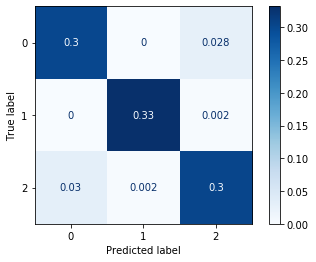

In [45]:
plot_cm = plot_confusion_matrix(lr_mod, X, y, cmap=plt.cm.Blues,
                                 normalize='all')

We can also perform *error analysis*, by visualizing for what class the model makes the largest number of errors. In order to do this, we can normalize the matrix by each class total (the `true` counts), and subsequently setting the diagonal elements to 0 (because the diagonal does not represent errors). 

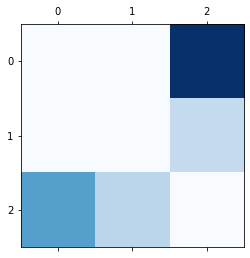

In [46]:
norm_conf_mat = confusion_matrix(y_test, y_pred_lr, normalize='true')
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, cmap=plt.cm.Blues)
plt.show()

From this plot, it results clear that the classifier has more difficulties at classifying instances of class 0, which are most often predicted in class 2. 
<br>
While there is no direct way to calculate the $f_1$ score in the multi-class case, we can exploit the One-vs-Rest approach used by `sklearn`. That is, it is possible to consider the models computed using each class as the positive one, and averaging the resulting $f_1$ scores with the methods seen in the binary case (macro and weighted):

In [47]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        35
           1       0.97      0.97      0.97        34
           2       0.85      0.90      0.88        31

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



For example, we can query the weighted $f_1$ score:

In [48]:
f1_score(y_test, y_pred_lr, average='weighted')

0.9203676470588235